###I want to compare the rhizosphere responders from Shengjing's experiment to my mineral-responsive OTUs - are they consistently "weedy" organisms?

In [67]:
from Bio import SeqIO
from Bio import Seq
from Bio.SeqRecord import SeqRecord
import pandas as pd
import numpy as np
from rpy2.robjects import pandas2ri

In [1]:
%load_ext rpy2.ipython
# Turning on in-IPy R capabilities

In [2]:
%load_ext mothurmagic
# Loads mothurmagic so we can run mothur in the notebook using %%mothur at the top of the cell

In [3]:
%%mothur
help()

TypeError: cannot concatenate 'str' and 'exceptions.OSError' objects

In [244]:
%%R
library(reshape)
library(ggplot2)
library(phyloseq)
library(dplyr)
library(RColorBrewer)
# Loading R libraries.

In [204]:
%%R
detach("package:plyr", unload=TRUE)

In [203]:
%%R
detach("package:reshape", unload=TRUE)
detach("package:phyloseq", unload=TRUE)
detach("package:ggplot2", unload=TRUE)
detach("package:dplyr", unload=TRUE)


In [2]:
! head ../data/mBioRootRespOTUseqs.fasta
#These are the sequences for the OTUs

>OTU_0
TACGGAGGGTGCGAGCGTTGTCCGGAATCATTGGGCGTAAAGGGCGCGTAGGTGGCCCGGTCAGTCTTTGGTGAAAGCGCGGGGCTCAACCCTGCGTCGGCCAGGGATACTGCCGCGGCTCGAGCACTGTAGAGGCAGGCGGAATTCCGGGTGTAGCGGTGGAATGCGTAGAGATCCGGAAGAACACCGGTGGCGAAGGCGGCCTGCTGGGCAGTTTTGCTGACACTGAGGCGAGACAGCGTGGGGAGCAAACAGG
>OTU_1
TACGGGTGGCGCTAGTGTTATTCTTCTTCATTGGGCGTAAAGGGTGCGTAGGCAGTAAAATAAGTTCTAAGTAACAACGTAAACAGAGAGCATTTCGATTACTTTCCATACTATTTTTCTAGAGTATTATAAGATATAATGGATCCTTTAATAAAGAATTTAAATGCGTTGGAATATTAAATAGGACGCCAAATACAAAAGTAATTATCTACGGAGATACTGACGCTGAGGCACTAAGGCATGGGGAGCGAATAGG
>OTU_10
GACGTAGGTGGCGAACGTTATCCGGAATTATTGGGCGTAAAGGGTGCGTAGATGGCTTGATAAGTTAGTAGTGGGAAATCGAGGCTCAACCTCGTGGAAGCTGGTAATACTGTCAGGCTCGAGTGCAGGAGAGGTTAACGGAACTCCATGTGGAGCGGTAAAATGTGTAGATATATGGAAGAACACCAATAACGGCGAAGGCAGTTAACTATTCTGTTACTGACATTGAGGCACGAAAGCGTGGGGAGCAAAACGG
>OTU_100
GACATAGGTCGCAAACGTTATCCGGAATTATTGGGCGTAAAGGGTGCGTAGATGGTATGATAAGTTAGCGGTGGGAAATCGAGGCTCAACCTCGTGGAAGCTGATAATACTGTTGTACTTGAGTACAGAAGAGGTTAACGGAACTCCATGTGGAGCGGTAAAATGCATCGATATATGGAAGAACACCAATAACGGCGA

In [79]:
%%R
RootResp = read.csv("../data/mBioRootResp.csv")
head(RootResp)
# These are the actual responders, by week.
# I might want to pull out which OUTs are (ever) responsive,
# noting for which weeks/seasons, and contrast with mineral responses
# Basically a table, with OTU, Time responding, Minerals responding
# Really, I should reclassify the OTUs, from both groups, to see which correspond to which

  Season Week        OTU   Domain        Phylum             Class        Order
1      2   12   OTU_7765 Bacteria Acidobacteria Acidobacteria_Gp1 Unclassified
2      2   12   OTU_4672 Bacteria Acidobacteria Acidobacteria_Gp1 Unclassified
3      2   12  OTU_70195 Bacteria Acidobacteria Acidobacteria_Gp1 Unclassified
4      2   12  OTU_13997 Bacteria Acidobacteria Acidobacteria_Gp1 Unclassified
5      2   12 OTU_226052 Bacteria Acidobacteria Acidobacteria_Gp1 Unclassified
6      2   12  OTU_18471 Bacteria Acidobacteria Acidobacteria_Gp1 Unclassified
        Family        Genus rhizo_enriched rhizo_depleted pvals_adj.adj...1.
1 Unclassified  Terriglobus              1              0        7.51000e-11
2 Unclassified Edaphobacter              1              0        4.59000e-10
3 Unclassified Edaphobacter              1              0        6.12000e-10
4 Unclassified  Terriglobus              1              0        1.77000e-05
5 Unclassified Edaphobacter              1              0     

In [80]:
%%R
RootResponders = RootResp %>%
    filter(rhizo_enriched==1)

In [81]:
%%R
# We can forget about the parameters that are not phylogenetic IDs  (pvals)
# Just reshape by OTU.
RootResponders = cast(RootResponders, OTU+Domain+Phylum+Class+Order+Family+Genus~Season+Week)
head(RootResponders)
# Nice. This gives us a table of all the OTUs that respond every, and which weeks they respond in
# Now the question is, how to combine this with my own OTUs.
# One option could be to build a tree with the combined OTUs, some of which
# may be basically the same, and to colour the rings by response.
# Not sure if that makes sense.
# What do I really want to say?

         OTU   Domain           Phylum              Class              Order
1      OTU_0 Bacteria Gemmatimonadetes   Gemmatimonadetes   Gemmatimonadales
2 OTU_100042 Bacteria Gemmatimonadetes   Gemmatimonadetes   Gemmatimonadales
3 OTU_100429 Bacteria   Proteobacteria Betaproteobacteria    Burkholderiales
4 OTU_100503 Bacteria   Proteobacteria Betaproteobacteria    Burkholderiales
5 OTU_100822 Bacteria    Bacteroidetes    Sphingobacteria Sphingobacteriales
6 OTU_100823 Bacteria   Proteobacteria Betaproteobacteria    Burkholderiales
             Family        Genus 1_3 1_6 1_9 1_12 2_3 2_6 2_9 2_12
1 Gemmatimonadaceae Gemmatimonas  NA  NA  NA   NA  NA  NA  NA    1
2 Gemmatimonadaceae Gemmatimonas  NA  NA   1   NA  NA  NA  NA   NA
3    Comamonadaceae   Variovorax   1   1  NA   NA  NA  NA  NA   NA
4    Comamonadaceae   Variovorax  NA  NA  NA    1  NA   1   1   NA
5  Chitinophagaceae Unclassified  NA  NA  NA   NA  NA   1   1   NA
6    Comamonadaceae   Roseateles   1   1   1    1   1   1  

In [51]:
%%R
dim(RootResponders)
# So we have 1123 root-responsive OTUs.

[1] 1123   15


In [52]:
%%R
# What if I took all the responsive OTUs, and then regrouped them?
# Or just took those that were actually the same?
# At least, I need to pull out the list of responsive OTUs, and select them from the fasta file
OTUs = levels(droplevels(RootResponders$OTU))
length(OTUs)

[1] 1123


In [53]:
%Rpull OTUs
# Taking that variable from R to Python

In [54]:
print type(OTUs)
print len(OTUs)

<type 'numpy.ndarray'>
1123


In [34]:
! head -100 ../data/mBioRootRespOTUseqs.fasta > ../data/mBioRootRespOTUseqs.fasta.mini
# Making toy data to work with

In [46]:
fasta_sequences = SeqIO.parse(open("../data/mBioRootRespOTUseqs.fasta"),'fasta')
with open("../data/mBioRootRespOnly.fasta","w+") as out_file:
    for fasta in fasta_sequences:
        record = fasta
        name, sequence = fasta.id, fasta.seq.tostring()
        if name in OTUs:
            SeqIO.write(fasta,out_file,"fasta")
    out_file.close()
#  This prunes our fasta file to only the responsive OTUs.

In [51]:
fasta_sequences = SeqIO.parse(open("../data/mBioRootRespOnly.fasta"),"fasta")
i=0
for fasta in fasta_sequences:
   i=i+1
print i
# We did get the right number of fasta sequences, so we should have them all.

1123


In [53]:
fasta_sequences = SeqIO.parse(open("../data/mBioRootRespOTUseqs.fasta"),"fasta")
i=0
for fasta in fasta_sequences:
   i=i+1
print i
# Pruned down from 199,169. So that's good.

199169


In [354]:
%%R
l2fc<-read.csv("../../SeqData/l2fcCombMonths.csv")
cutoff = 1
# Doubling is the cutoff for OTUs of interest.
FDR = 0.1
# False discovery rate

MinResponders = l2fc %>%
    group_by(Trtmt)%>%
    mutate(Sig = ifelse(padj<FDR&l2FC>=cutoff,1,0))%>%
    mutate(Sig = ifelse(is.na(padj)==TRUE,0,Sig))%>%
    filter(Sig == 1)
head(MinResponders)
# Now we want to do the same as above, forgetting the size of response, pvals, etc.

Source: local data frame [6 x 16]
Groups: Trtmt [1]

   Trtmt      OTU  baseMean     l2FC        SE       pvalue  Kingdom
  <fctr>   <fctr>     <dbl>    <dbl>     <dbl>        <dbl>   <fctr>
1 Quartz  69_2370 59.544024 4.651747 0.6734146 4.925667e-12 Bacteria
2 Quartz 58_38953  1.880054 3.473145 1.3833426 1.204953e-02 Bacteria
3 Quartz 64_17823  5.718793 2.306052 0.9353531 1.368472e-02 Bacteria
4 Quartz 55_44940  1.702184 4.874833 1.7798673 6.164991e-03 Bacteria
5 Quartz    19_66 42.014312 1.625349 0.6414663 1.128321e-02 Bacteria
6 Quartz 15_66648  1.505686 4.896045 1.6910179 3.787671e-03 Bacteria
# ... with 9 more variables: Phylum <fctr>, Class <fctr>, Order <fctr>,
#   Family <fctr>, Genus <fctr>, Species <fctr>, Total <dbl>, padj <dbl>,
#   Sig <dbl>


In [356]:
%%R
MinResponders = cast(MinResponders, OTU+Kingdom+Phylum+Class+Order+Family+Genus~Trtmt)
head(MinResponders)
# Ok, so now we have analogous column.

       OTU  Kingdom         Phylum          Class           Order
1  1_11013 Bacteria    Chloroflexi    Chloroflexi [Roseiflexales]
2  1_12933 Bacteria     Firmicutes     Clostridia   Clostridiales
3 1_148152 Bacteria Actinobacteria Actinobacteria Actinomycetales
4  1_17323 Bacteria Planctomycetes  Phycisphaerae Phycisphaerales
5   1_1999 Bacteria Actinobacteria Actinobacteria Actinomycetales
6  1_21395 Bacteria          WPS-2           <NA>            <NA>
              Family           Genus Ferrihydrite Heavy Fraction Kaolinite
1 [Kouleothrixaceae]            <NA>            1             NA        NA
2     Clostridiaceae     Clostridium            1             NA        NA
3 Corynebacteriaceae Corynebacterium           NA             NA         1
4               <NA>            <NA>           NA             NA        NA
5    Nocardioidaceae            <NA>            1             NA        NA
6               <NA>            <NA>            1             NA        NA
  Quartz
1   

In [57]:
%%R
MinOTUs = levels(droplevels(MinResponders$OTU))
length(MinOTUs)

[1] 1504


In [82]:
%Rpull MinOTUs
# Taking that variable from R to Pythonfrom Bio import SeqIO

fasta_sequences = SeqIO.parse(open("../../SeqData/otus.pick.fasta"),'fasta')
with open("../data/MinRespOnly.fasta","w+") as out_file:
    for fasta in fasta_sequences:
        record = fasta
        name, sequence = fasta.id, fasta.seq.tostring()
        if name in MinOTUs:
            SeqIO.write(fasta,out_file,"fasta")
    out_file.close()
#  This prunes our minerals fasta file to only the responsive OTUs.

56_65
62_48
69.2_296
56_187
103_43
53_7
70_162
62_409
65_225
44_107
7_421
7_186
74.2_42
67.2_120
95_332
52_609
7_262
50_22
7_351
56_9
96_312
77.2_492
39_38
15_985
92_274
64_75
79_241
67.2_1156
91_2883
70_320
67_141
50_112
69_735
83_765
65_669
67_57
64_380
59_138
39_1781
19_66
26_127
69_132
41_506
28_317
99_239
76_1221
69.2_1826
28_252
28_1188
62_892
67_462
104_97
55_2019
44_900
13_1814
77.2_46
74.2_1103
61_1062
92_3084
23_1444
72.2_697
21_1200
19_889
99_755
28_125
67_632
21_1330
76.2_291
41_51
21_571
38_665
71_2269
23_1011
96_1289
49_78
69.2_1107
61_1097
64_2133
26_909
13_1198
79_292
106_1749
72_513
23_474
39_2006
65_1697
67.2_5389
100_490
80_83
72.2_6497
76_884
7_305
1_601
93_1996
58_1644
19_310
103_55
62_859
104_1206
58_1106
72_498
41_1294
70_3218
96_1726
65_591
67.2_3465
26_2017
69_264
55_6439
73.2_771
76_1078
58_524
74.2_193
1_6803
61_1176
89_4190
13_61
39_33
10_5524
1_232
69_2370
71_405
89_345
23_675
67_819
28_1362
23_2594
49_122
38_1576
93_9741
1_6416
72_1142
67_2946
72_836
96_38

In [84]:
fasta_sequences = SeqIO.parse(open("../../SeqData/otus.pick.fasta"),"fasta")
i=0
for fasta in fasta_sequences:
   i=i+1
print i
# Pruned down from 199,169. So that's good.

9209


In [83]:
fasta_sequences = SeqIO.parse(open("../data/MinRespOnly.fasta"),"fasta")
i=0
for fasta in fasta_sequences:
   i=i+1
print i
# Pruned down from 9209, and got the right number. Should have all seqs now.

1504


In [85]:
# Okay, so we have all the sequences of root-responsive OTUs,
# and all the sequences of the mineral-responsive OTUs.
# So, now we want to see which OTUs, if any are common.
# Could start by pooling sequences and binning them...
# Would need to trim them, etc., first.
# We need to make a file of all the sequences..
! cat ../data/MinRespOnly.fasta ../data/mBioRootRespOnly.fasta > ../data/AllResp.fasta

In [86]:
fasta_sequences = SeqIO.parse(open("../data/AllResp.fasta"),"fasta")
i=0
for fasta in fasta_sequences:
   i=i+1
print i

2627


In [87]:
1504+1123
# Yes, that file has all the sequences.

2627

In [12]:
%%mothur
unique.seqs(fasta=../data/AllResp.fasta)
# All seqs are unique

mothur > unique.seqs(fasta=../data/AllResp.fasta)
2627	2627

Output File Names:
../data/AllResp.names
../data/AllResp.unique.fasta


mothur > quit()


In [13]:
%%mothur
summary.seqs(fasta=../data/AllResp.fasta)
# Nicely, it looks like Shengjing and I trimmed our sequences to similarl lengths.

mothur > summary.seqs(fasta=../data/AllResp.fasta)

Using 1 processors.

Start	End	NBases	Ambigs	Polymer	NumSeqs
Minimum:	1	251	251	0	3	1
2.5%-tile:	1	252	252	0	4	66
25%-tile:	1	252	252	0	4	657
Median: 	1	252	252	0	4	1314
75%-tile:	1	253	253	0	5	1971
97.5%-tile:	1	254	254	0	6	2562
Maximum:	1	256	256	0	12	2627
Mean:	1	252.491	252.491	0	4.58584
# of Seqs:	2627

Output File Names:
../data/AllResp.summary

It took 0 secs to summarize 2627 sequences.

mothur > quit()


In [14]:
%%mothur
align.seqs(candidate=../data/AllResp.fasta, template=../../SeqData/db/silva.total.filter.pcr.filter.fasta, processors=4, flip=T, ksize=9)
# Trying to align our sequences...

mothur > align.seqs(candidate=../data/AllResp.fasta, template=../../SeqData/db/silva.total.filter.pcr.filter.fasta, processors=4, flip=T, ksize=9)

Using 4 processors.

Reading in the ../../SeqData/db/silva.total.filter.pcr.filter.fasta template sequences...	DONE.
It took 2 to read  18491 sequences.
Aligning sequences from ../data/AllResp.fasta ...
It took 2 secs to align 2627 sequences.


Output File Names:
../data/AllResp.align
../data/AllResp.align.report


mothur > quit()


In [16]:
%%mothur
summary.seqs(fasta=../data/AllResp.align)
# They actually aligned pretty well, too, along the same region (as expected with same primers)
# They start and end at the same place, generally, are similar lengths..
# Might as well go ahead and group them.

mothur > summary.seqs(fasta=../data/AllResp.align)

Using 1 processors.

Start	End	NBases	Ambigs	Polymer	NumSeqs
Minimum:	987	3812	251	0	3	1
2.5%-tile:	987	3812	252	0	4	66
25%-tile:	987	3812	252	0	4	657
Median: 	987	3812	252	0	4	1314
75%-tile:	987	3813	253	0	5	1971
97.5%-tile:	987	3813	254	0	6	2562
Maximum:	987	3813	256	0	12	2627
Mean:	987	3812.43	252.491	0	4.58584
# of Seqs:	2627

Output File Names:
../data/AllResp.summary

It took 0 secs to summarize 2627 sequences.

mothur > # They actually aligned pretty well, too.
[ERROR]: You are missing (
Invalid.

mothur > quit()


************************************************************
************************************************************
************************************************************
Detected 1 [ERROR] messages, please review.
************************************************************
************************************************************
************************************************************


###I need to generate the equivalent of barcode labels for the sequences.
###I need, like, to generate one example of each OTU as a "read", with a barcode label for each sequence.
###Needs to look like this:
####>67.2_0;barcodelabel=67.2
####GACGTAGGGTGCAAGCGTTGTCCGGATTTATTGGGCATAAAGAGCTCGTAGGCGGCTTGTTGCGTCGACCGTGAAAACCTACCGCTTAACGGTGGGCTTGCGGTCGATACGGGCAGGCTAGAGTTCGGTAGGGGAGACTGGAATTCCTGGTGTAGCGGTGAAATGCGCAGATATCAGGAGGAACACCGGTGGCGAAGGCGGGTCTCTGGGCCGATACTGACGCTGAGGAGCGAAAGCGTGGGGAGCGAACAG

In [ ]:
# Need to take in AllSeqs file
# Check what the name is.
# Check where that name is in the existing OTU lists for minerals and for rhizo
# Add it to the database with ";barcodelabel=XXX"
# Repeat for every presence

In [28]:
! head -100 ../data/AllResp.fasta > ../data/AllResp.fasta.mini

In [60]:
# Need to make the dataframes in Python
%Rpull RootResponders
%Rpull MinResponders
# Taking that variable from R to Python

In [83]:
from rpy2.robjects import pandas2ri
pandas2ri.activate()

from rpy2.robjects import r

RootResponders = pandas2ri.ri2py(r['RootResponders'])
MinResponders = pandas2ri.ri2py(r['MinResponders'])

In [85]:
RootRespondersDict = RootResponders.set_index('OTU').to_dict()
MinRespondersDict = MinResponders.set_index('OTU').to_dict()

In [86]:
MinRespondersDict['Class']['39_212135']
# This gets the class for OTU X.

'SJA-4'

In [88]:
RootParams = ["2_12","2_9","2_6","2_3","1_12","1_9","1_6","1_3"]
MinParams = ["Ferrihydrite","Heavy Fraction","Kaolinite","Quartz"]
# Creating lists of the headings in our table

In [58]:
%Rpull MinOTUs

In [89]:
from Bio import SeqIO

fasta_sequences = SeqIO.parse(open("../data/MinRespOnly.fasta"),'fasta')
with open("../data/MinRespBarcoded.fasta","w+") as out_file:
    for fasta in fasta_sequences:
        #fasta.name = ""
        #fasta.description = ""
        OTUname, sequence = fasta.id, fasta.seq.tostring()
        if OTUname in OTUs:
            for X in RootParams:
                if RootRespondersDict[X][OTUname] ==1:
                    record = fasta
                    name = record.id
                    newname = OTUname + ";barcodelabel=" + X
                    record.id = newname
                    record.description = ""
                    record.name = ""
                    SeqIO.write(record,out_file,"fasta")
        if OTUname in MinOTUs:
            for Y in MinParams:
                if MinRespondersDict[Y][OTUname]==1:
                    record = fasta
                    name = record.id
                    newname = OTUname + ";barcodelabel=" + Y
                    record.id = newname
                    record.description = ""
                    record.name = ""
                    SeqIO.write(record, out_file,"fasta")
    out_file.close()

In [154]:
fasta_sequences = SeqIO.parse(open("../data/AllRespBarcoded.fasta"),"fasta")
i=0
for fasta in fasta_sequences:
   i=i+1
print i
# Our nubmers have increased because some respond multiple times.

4728


In [93]:
!head ../data/MinRespBarcoded.fasta

>56_65;barcodelabel=Ferrihydrite
TACGGAGGGTGCAAGCGTTATCCGGATTCACTGGGTTTAAAGGGTGCGTAGGCGGACATG
TAAGTCCGTGGTGAAATCTCCGAGCTTAACTCGGAAACTGCCATGGATACTATATGTCTT
GAATGTTGTGGAGGTTAGCGGAATATGTCATGTAGCGGTGAAATGCATAGATATGACATA
GAACACCAATTGCGAAGGCAGCTGGCTACACAAATATTGACGCTGAGGCACGAAAGCGTG
GGGATCAAACAG
>56_65;barcodelabel=Quartz
TACGGAGGGTGCAAGCGTTATCCGGATTCACTGGGTTTAAAGGGTGCGTAGGCGGACATG
TAAGTCCGTGGTGAAATCTCCGAGCTTAACTCGGAAACTGCCATGGATACTATATGTCTT
GAATGTTGTGGAGGTTAGCGGAATATGTCATGTAGCGGTGAAATGCATAGATATGACATA


####Ok, that might have worked - need to test on full data

In [156]:
!usearch -derep_fulllength ../data/AllRespBarcoded.fasta -fastaout ../data/AllRespSized.fasta -sizeout -threads 4

usearch v8.0.1623_i86osx32, 4.0Gb RAM (17.2Gb total), 4 cores
(C) Copyright 2013-15 Robert C. Edgar, all rights reserved.
http://drive5.com/usearch

Licensed to: tlw59@cornell.edu

00:00 4.4Mb  100.0% Reading ../data/AllRespBarcoded.fasta
00:00 3.4Mb 4728 seqs, 2627 uniques, 1765 singletons (67.2%)
00:00 3.5Mb Min size 1, median 1, max 8, avg 1.80
00:00 3.5Mb  100.0% Writing ../data/AllRespSized.fasta


In [29]:
# Here we are just creating the centroids, or "seeds" for future clustering
# Could clustering more or less narrowly
# Could just use MinOTUs as input for 

!usearch -cluster_otus ../data/AllRespSized.fasta -otus ../data/AllRespOTUs.fasta

usearch v8.0.1623_i86osx32, 4.0Gb RAM (17.2Gb total), 4 cores
(C) Copyright 2013-15 Robert C. Edgar, all rights reserved.
http://drive5.com/usearch

Licensed to: tlw59@cornell.edu

00:03 9.8Mb  100.0% 1793 OTUs, 550 chimeras (20.9%)


In [100]:
!usearch -usearch_global  ../data/AllRespOTUs.fasta \
-db ../data/MinRespOnly.fasta \
-strand plus -id 0.80 \
-uc ../data/AllResp.uc \
-threads 4
### Can change -id to be lax or more stringent for Shengjing's mBio matches

usearch v8.0.1623_i86osx32, 4.0Gb RAM (17.2Gb total), 4 cores
(C) Copyright 2013-15 Robert C. Edgar, all rights reserved.
http://drive5.com/usearch

Licensed to: tlw59@cornell.edu

00:00 2.2Mb  100.0% Reading ../data/MinRespOnly.fasta
00:00 1.8Mb  100.0% Masking
00:00 2.6Mb  100.0% Word stats
00:00 2.6Mb  100.0% Alloc rows
00:00 4.1Mb  100.0% Build index
00:00 6.1Mb  100.0% Searching AllRespOTUs.fasta, 99.6% matched


In [101]:
# Makes an OTU table
# It will tell me the OTU ID, and then for all the samples, which OTUs it has sequences from.
!python /opt/virt_env/bin/uc2otutab.py ../data/AllResp.uc > ../data/AllRespOTUTable.txt

../data/AllResp.uc 100.0%   


In [102]:
# Issues with biom table formatting
!if [ -f ../data/AllRespOTUTable.biom ]; then rm ../data/AllRespOTUTable.biom ; fi #This is to mitigate a biom bug
!biom convert -i ../data/AllRespOTUTable.txt  -o ../data/AllRespOTUTable.biom  --table-type="OTU table" --to-json

In [103]:
# Issues with biom table formatting
!if [ -f ../data/AllRespOTUTable_summary.txt ]; then rm ../data/AllRespOTUTable_summary.txt; fi #This is to mitigate a biom bug
!biom summarize-table -i ../data/AllRespOTUTable.biom -o ../data/AllRespOTUTable_summary.txt

In [104]:
# This tells us the overall data info
# Num obs = OTUs
# total count = total seqs
# Chantal had 50% reduction after QC.

!cat ../data/AllRespOTUTable_summary.txt

Num samples: 12
Num observations: 1432
Total count: 1786
Table density (fraction of non-zero values): 0.098

Counts/sample summary:
 Min: 15.0
 Max: 809.0
 Median: 54.500
 Mean: 148.833
 Std. dev.: 218.615
 Sample Metadata Categories: None provided
 Observation Metadata Categories: None provided

Counts/sample detail:
 1_3: 15.0
 1_6: 22.0
 1_9: 26.0
 2_3: 31.0
 2_6: 38.0
 Quartz: 49.0
 2_9: 60.0
 Heavy: 93.0
 1_12: 97.0
 2_12: 210.0
 Ferrihydrite: 336.0
 Kaolinite: 809.0


#####1287 from minerals, 499 from roots

### OK, so this should be all the responders, grouped into overlapping OTUs.
### 1504 in one set, 1123 in the other, so at least 649 overlapping.

In [105]:
# The latest greengenes db was updated from the QIIME website 
# This is the assign taxonomy command from QIIME, using the greengenes database at 97%.
# It is using the default uclust method, at default min 0.9 similarity
nprocs = 4
!assign_taxonomy.py -i ../data/MinRespOnly.fasta -o ../data/Taxonomy

In [106]:
# Joining the classification taxonomy to the biom table
!if [ -f ../data/AllRespOTUTable.tax.biom ]; then rm ../data/AllRespOTUTable.tax.biom; fi #This is to mitigate a biom bug
! biom add-metadata -i ../data/AllRespOTUTable.biom -o ../data/AllRespOTUTable.tax.biom \
--observation-metadata-fp ../data/Taxonomy/MinRespOnly_tax_assignments.txt \
--observation-header OTUID,taxonomy,confidence,numrefdbseqs --sc-separated taxonomy 

In [107]:
%%R
physeq = import_biom("../data/AllRespOTUTable.tax.biom", parseFunction = parse_taxonomy_greengenes)

In [42]:
%%R
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1793 taxa and 12 samples ]
tax_table()   Taxonomy Table:    [ 1793 taxa by 8 taxonomic ranks ]


In [108]:
%%R
otu_table(physeq)
# Definitely are some repeat OTUs

OTU Table:          [1432 taxa and 12 samples]
                     taxa are rows
             2_12 2_9 2_6 2_3 1_12 Ferrihydrite Heavy Kaolinite 1_6 1_9 Quartz
7_262           1   0   0   0    0            0     0         0   0   0      0
65_669          1   0   0   0    2            0     0         0   0   0      0
41_506          1   0   0   0    0            0     0         0   0   0      0
59_114388       2   0   0   0    0            0     0         0   0   0      0
21_143124       1   0   0   0    0            0     0         0   0   0      0
67.2_1156       5   2   1   0    1            0     0         0   1   0      0
62_48           6   0   0   0    0            0     0         0   0   1      0
69.2_296        1   0   0   0    0            0     0         0   0   0      0
68.2_112149     2   0   0   1    0            0     0         1   0   0      0
3_162608        1   1   0   0    0            0     0         0   0   0      0
7_421           7   1   0   0    2            0  

In [125]:
%%R
OTUtab = data.frame(otu_table(physeq))

In [128]:
%%R
OTUtab = OTUtab[ , c("Heavy","Ferrihydrite","Quartz","Kaolinite","X1_3","X1_6","X1_9","X1_12","X2_3","X2_6","X2_9","X2_12")]

In [129]:
%%R
colSums(OTUtab)
# How many Root responders were there in each category the first place?
# Diff. btw detection and non-response

       Heavy Ferrihydrite       Quartz    Kaolinite         X1_3         X1_6 
          93          336           49          809           15           22 
        X1_9        X1_12         X2_3         X2_6         X2_9        X2_12 
          26           97           31           38           60          210 


In [357]:
%%R
colSums(RootResponders, na.rm=TRUE)

 1_3  1_6  1_9 1_12  2_3  2_6  2_9 2_12 
 199  344  427  568  290  332  375  370 


In [136]:
%%R
#Fract root responders in common with (any) mineral
TotalRoot = colSums(RootResponders,na.rm=TRUE)
MinRoot = colSums(OTUtab)[5:12]
MinRoot

 X1_3  X1_6  X1_9 X1_12  X2_3  X2_6  X2_9 X2_12 
   15    22    26    97    31    38    60   210 


In [137]:
%%R
MinRoot/TotalRoot
# These are the fractions of root responders that were detected as responding in any mineral
# More late responders were found in minerals... hmm...
# That kind of makes sense - actual rhizosphere responders vs. detritosphere responders.

      X1_3       X1_6       X1_9      X1_12       X2_3       X2_6       X2_9 
0.07537688 0.06395349 0.06088993 0.17077465 0.10689655 0.11445783 0.16000000 
     X2_12 
0.56756757 


In [156]:
%%R
# Would be good to have list of responders, and to then map those on to the 
# differential abundance figures
ROTUs = OTUtab[5:12] %>%
    dplyr::mutate(Sum=rowSums())%>%
    dplyr::filter(Sum>0)
ROTUs


Error in eval(expr, envir, enclos) : 
  argument "x" is missing, with no default


In [172]:
%%R
OTUtabr = subset(OTUtab[,5:12], rowSums(OTUtab[,5:12])>0)
OTUtabr
# This gets us all the OTUs for which there was some root responder common to a mineral responder.
RootRespList = rownames(OTUtabr)

In [228]:
%%R
RootRespList

  [1] "7_262"        "65_669"       "41_506"       "59_114388"    "21_143124"   
  [6] "67.2_1156"    "62_48"        "69.2_296"     "68.2_112149"  "3_162608"    
 [11] "7_421"        "72.2_8442"    "74.2_42"      "69.2_13522"   "13_245438"   
 [16] "64_75"        "59_35480"     "80_83"        "44_107"       "103_43"      
 [21] "26_21429"     "79_292"       "70.2_2831"    "21_184907"    "56_65"       
 [26] "77_38372"     "74_265762"    "1_601"        "70_162"       "96_1038"     
 [31] "15_14269"     "72.2_12524"   "28_252"       "13_61"        "70_49"       
 [36] "19_66"        "67.2_366279"  "71_6491"      "44_4257"      "44_390554"   
 [41] "56_1259624"   "89_38255"     "62_409"       "58_167"       "52_609"      
 [46] "91_150445"    "96_288303"    "28_125"       "76.2_3144"    "65_8447"     
 [51] "56_9"         "75.2_25586"   "59_138"       "13_1814"      "69.2_6056"   
 [56] "26_909"       "73.2_4401"    "83_765"       "74.2_3548"    "13_1198"     
 [61] "75_978257"    "55_656


###Making Diff abund figures with root responders included

In [198]:
%%R
l2fc<-read.csv("../../SeqData/l2fc.csv")

In [498]:
%%R
d = l2fc

d$relabund = d$baseMean/sum(d$baseMean)

NPhylum = d %>%
    group_by(Phylum)%>%
    filter(pvalue<0.1)%>%
    summarize(NSig=n())%>%
    arrange(-NSig)

cutoff = 10
NPhylum=droplevels(NPhylum[1:cutoff,1])
NPhylum=levels(as.factor(NPhylum$Phylum))

d<-d[d$Phylum %in% NPhylum,]
d$Phylum<-factor(d$Phylum)
d$Phylum<-ordered(d$Phylum,levels=NPhylum)

head(d)

    Trtmt       OTU  baseMean     l2FC       SE     pvalue  Kingdom
5  Quartz  73_37380 4.9772368 1.716102 1.887958 0.36336472 Bacteria
6  Quartz  65_11911 0.9298593 1.005215 1.420861 0.47927511 Bacteria
7  Quartz  72_12468 0.6349874 3.505067 1.942905 0.07122598 Bacteria
8  Quartz  74_50643 1.1912872 1.342028 1.376871 0.32971225 Bacteria
9  Quartz 74.2_3363 2.5422823 1.129309 0.918182 0.21871956 Bacteria
10 Quartz  89_15230 2.0957988 1.623852 1.250418 0.19406509 Bacteria
           Phylum                 Class             Order             Family
5  Proteobacteria Epsilonproteobacteria Campylobacterales Campylobacteraceae
6  Proteobacteria   Deltaproteobacteria Bdellovibrionales Bacteriovoracaceae
7  Proteobacteria   Deltaproteobacteria Bdellovibrionales Bacteriovoracaceae
8  Proteobacteria   Deltaproteobacteria Bdellovibrionales Bacteriovoracaceae
9  Proteobacteria   Deltaproteobacteria Bdellovibrionales Bacteriovoracaceae
10 Proteobacteria   Deltaproteobacteria Bdellovibrionales Bact

In [290]:
%%R
for (i in c(1:dim(d)[1])){
    if (d$OTU[i] %in% RootRespList){
        d$RootResp[i] = 1
    }        else{d$RootResp[i] = 0}
    }
head(d)

  Month        Trtmt       OTU   baseMean      l2FC        SE       pvalue
3     2 Ferrihydrite  73_37380 13.6665680  2.854742 2.2906143           NA
4     2 Ferrihydrite  74_50643  1.6006690  1.881786 1.0583385 7.539450e-02
5     2 Ferrihydrite 74.2_3363  6.4024671  4.892174 1.0244890 1.794988e-06
6     2 Ferrihydrite  89_15230  5.8980628  4.506540 0.9315875 1.314925e-06
7     2 Ferrihydrite 38_207563  0.6391196 -2.850758 2.2359397 2.023195e-01
8     2 Ferrihydrite   65_8447  8.9905679  8.123747 1.8192682 7.992202e-06
   Kingdom         Phylum                 Class             Order
3 Bacteria Proteobacteria Epsilonproteobacteria Campylobacterales
4 Bacteria Proteobacteria   Deltaproteobacteria Bdellovibrionales
5 Bacteria Proteobacteria   Deltaproteobacteria Bdellovibrionales
6 Bacteria Proteobacteria   Deltaproteobacteria Bdellovibrionales
7 Bacteria Proteobacteria   Deltaproteobacteria   Spirobacillales
8 Bacteria  Bacteroidetes            Cytophagia      Cytophagales
             

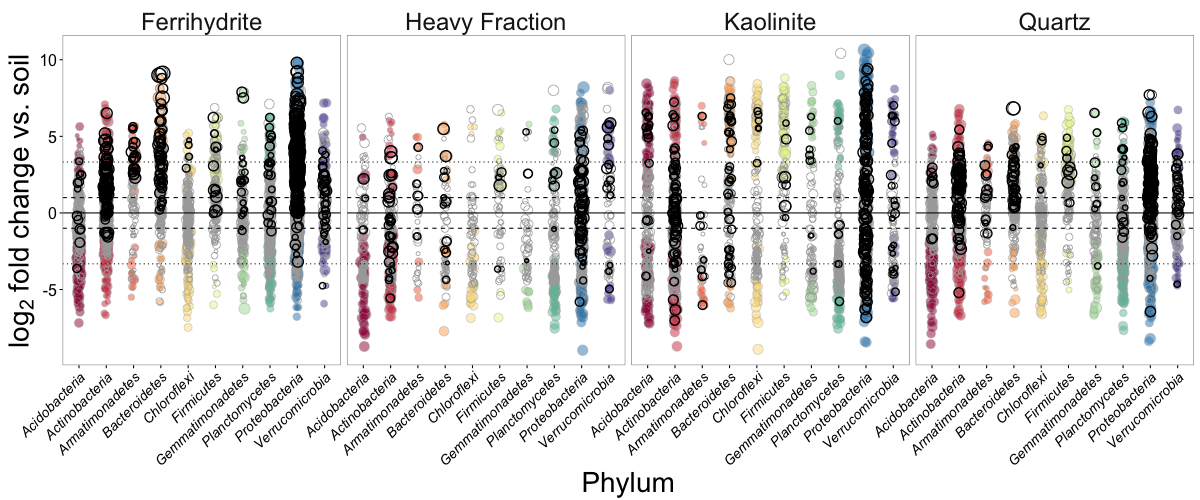

In [292]:
%%R -w 1200 -h 500

d$sig = ifelse(d$padj<=0.1,"yes","NS")
d$sig = ifelse(is.na(d$padj),"NS",paste(d$sig))

d$RootResp = as.factor(d$RootResp)

d.yes = d[d$sig=="yes",]
d.no = d[d$sig=="NS",]
d.RootResp = d[d$RootResp=="1",]

p = ggplot(d, aes(x=Species, y=l2FC, colour = RootResp))
p = p + geom_point(data=d.yes, aes(x = Phylum, y = l2FC, fill = Phylum, size=relabund), shape = 21, alpha=0.5, position = position_jitter(w = 0.20))
p = p + geom_point(data=d.no, aes(x = Phylum, y = l2FC, size=relabund), shape = 21, alpha=1, position = position_jitter(w = 0.20))
p = p + geom_point(data=d.RootResp, aes(x = Phylum, y = l2FC, size=relabund), shape = 21, stroke = 1, alpha=1, colour="black", position = position_jitter(w = 0.20))

p = p + facet_grid(~Trtmt, scales="free_x")

p = p + scale_size_continuous("log(Relative\nAbundance)",trans="log",guide="none")
    
p = p + geom_hline(yintercept = 1, linetype=2)
p = p + geom_hline(yintercept = -1, linetype=2)
p = p + geom_hline(yintercept = 3.3219, linetype=3)
p = p + geom_hline(yintercept = -3.3219, linetype=3)
p = p + geom_hline(yintercept = 0.0, linetype=1)
# puts in horizontal lines at reference values

colourCount = cutoff
getPalette = colorRampPalette(brewer.pal(cutoff, "Spectral"))
p = p + scale_fill_manual(guide="none", values=c(paste(getPalette(colourCount)),"black"))
p = p + scale_colour_manual(guide="none",values=alpha(c("darkgrey","black"),1))

p = p + theme_bw()
# sets a theme

p = p + theme(strip.text.x = element_text(size = 24),
              strip.text.y = element_text(size = 24),
              axis.text.x = element_text(size = 14, angle = 45, hjust = 1, vjust = 1, face="italic"),
              axis.title.x = element_text(size = 28),
              axis.text.y = element_text(size=16),
              axis.title.y = element_text(size = 28),
              legend.title = element_text(size=20),
              legend.text = element_text(size = 14),
              #legend.position = "none",
              strip.background = element_blank())
# sets a bunch of visual paramters for the legend (none) and other text
    
p = p + labs(x = "Phylum")
# sets the label for the x axis. I think they didn't get the different colours.

p = p + labs(y = expression(paste("", log[2]," fold change vs. soil",sep="")))
# sets the label for the y axes.

p = p + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())
# Gets rid of the default gridlines

p

In [294]:
%%R
ggsave(filename="DiffAbundRootResp.jpg", plot=p ,width=12, height=6)

In [339]:
%%R
FractMinRoot = MinRoot/TotalRoot
FractMinRoot = data.frame(FractMinRoot)
FractMinRoot$Timepoint = row.names(FractMinRoot)
FractMinRoot$Names = factor(FractMinRoot$Timepoint, levels = c("X1_3","X1_6","X1_9","X1_12","X2_3","X2_6","X2_9","X2_12"))
FractMinRoot$Names = plyr::revalue(FractMinRoot$Names, c("X1_3"="1_3","X1_6"="1_6","X1_9"="1_9","X1_12"="1_12","X2_3"="2_3","X2_6"="2_6","X2_9"="2_9","X2_12"="2_12"))

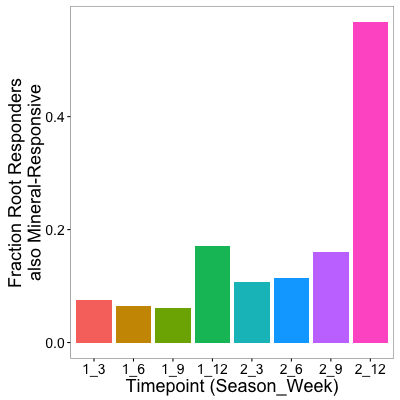

In [404]:
%%R -w 400 -h 400
p = ggplot(FractMinRoot, aes(y=FractMinRoot,x=Names, fill=Names))
p = p + geom_bar(stat="identity")

p = p + theme_bw()
p = p + theme(strip.text.x = element_text(size = 18),
              strip.text.y = element_text(size = 18),
              axis.text.x = element_text(size = 14),
              axis.title.x = element_text(size = 18),
              axis.text.y = element_text(size=14),
              axis.title.y = element_text(size = 18),
              strip.background = element_blank())
p = p + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())
# Gets rid of the default gridlines
p = p + labs(x = "Timepoint (Season_Week)", y="Fraction Root Responders\nalso Mineral-Responsive")
# sets the label for the axes.

p = p + guides(fill=FALSE)


p

In [405]:
%%R
ggsave(filename="FractRootMinResp.jpg", plot=p ,width=5, height=5)

In [378]:
%%R
OTUtab$MinResp = rowSums(OTUtab[1:4])
# This gives how many OTUs were "mineral responders" to begin with.
OTUtab$RootResp = rowSums(OTUtab[5:12])
# This gives how many OTUs were "mineral responders" to begin with.

MinRootResp = OTUtab %>%
    filter(RootResp>0)
MinAllResp = OTUtab %>%
    filter(MinResp>0)
# There are 1287 Mineral responding OTUs
# I want to know how many in each mineral.

MinRootRespSums = colSums(MinRootResp[,1:4])
# 93 in Heavy, 336 in Ferri, 49 in Quartz, 809 in Kaolinite
MinAllRespSums = colSums(MinAllResp[,1:4])
# How many had some root response?
FractRootMin = MinRootRespSums/MinAllRespSums

In [375]:
%%R
OTUtabm = subset(OTUtab[,1:4], rowSums(OTUtab[,5:12])>0)
OTUtabm
# This gets us all the OTUs for which there was some root responder common to a mineral responder.
MinRespList = rownames(OTUtabm)
MinRespList
# We have a list of all the mineral responders...

  [1] "7_262"        "65_669"       "41_506"       "59_114388"    "21_143124"   
  [6] "67.2_1156"    "62_48"        "69.2_296"     "68.2_112149"  "3_162608"    
 [11] "7_421"        "72.2_8442"    "74.2_42"      "69.2_13522"   "13_245438"   
 [16] "64_75"        "59_35480"     "80_83"        "44_107"       "103_43"      
 [21] "26_21429"     "79_292"       "70.2_2831"    "21_184907"    "56_65"       
 [26] "77_38372"     "74_265762"    "1_601"        "70_162"       "96_1038"     
 [31] "15_14269"     "72.2_12524"   "28_252"       "13_61"        "70_49"       
 [36] "19_66"        "67.2_366279"  "71_6491"      "44_4257"      "44_390554"   
 [41] "56_1259624"   "89_38255"     "62_409"       "58_167"       "52_609"      
 [46] "91_150445"    "96_288303"    "28_125"       "76.2_3144"    "65_8447"     
 [51] "56_9"         "75.2_25586"   "59_138"       "13_1814"      "69.2_6056"   
 [56] "26_909"       "73.2_4401"    "83_765"       "74.2_3548"    "13_1198"     
 [61] "75_978257"    "55_656

In [406]:
%%R

FractRootMin = data.frame(FractRootMin)
FractRootMin$Trtmt = row.names(FractRootMin)
FractRootMin$Names = factor(FractRootMin$Trtmt, levels = c("Ferrihydrite","Quartz","Kaolinite","Heavy"))
FractRootMin$Names = plyr::revalue(FractRootMin$Names, c("Ferrihydrite"="Ferrihydrite","Quartz"="Quartz","Kaolinite"="Kaolinite","Heavy"="Heavy\nFraction"))

In [398]:
%%R
FractRootMin

             FractRootMin    Timepoint        Trtmt          Names
Heavy           0.1290323        Heavy        Heavy Heavy Fraction
Ferrihydrite    0.1577381 Ferrihydrite Ferrihydrite   Ferrihydrite
Quartz          0.2653061       Quartz       Quartz         Quartz
Kaolinite       0.0815822    Kaolinite    Kaolinite      Kaolinite


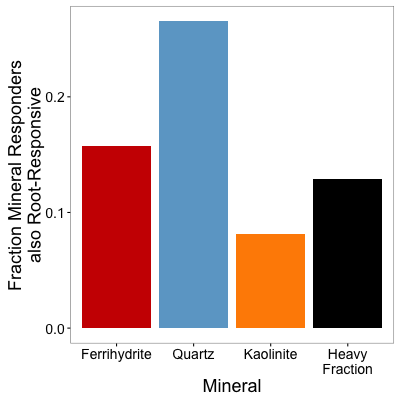

In [407]:
%%R -w 400 -h 400
p = ggplot(FractRootMin, aes(y=FractRootMin,x=Names, fill=Names))
p = p + geom_bar(stat="identity")

p = p + theme_bw()
p = p + theme(strip.text.x = element_text(size = 18),
              strip.text.y = element_text(size = 18),
              axis.text.x = element_text(size = 14),
              axis.title.x = element_text(size = 18),
              axis.text.y = element_text(size=14),
              axis.title.y = element_text(size = 18),
              strip.background = element_blank())
p = p + theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())
# Gets rid of the default gridlines

p = p + scale_fill_manual(values=c("red3","skyblue3","darkorange","black","chartreuse4","gold1"))

p = p + labs(x = "Mineral", y="Fraction Mineral Responders\nalso Root-Responsive")
# sets the label for the axes.

p = p + guides(fill=FALSE)


p

In [408]:
%%R
ggsave(filename="FractMinRootResp.jpg", plot=p ,width=5, height=5)

###Next / last thing I want to do is look at it more phylogenetically, maybe?

#### Could I make a tree with outlines of which mineral each OTU responds to and which day it responds to? That'd be nice

In [430]:
%%R
# I need the original phyloseq object, from the full dataset.
# Then, I want to add a layer of data on, for is it responsive to X (each mineral type,
# and each root timepoint).

physeq.full = import_biom("../../SeqData/otu_table.tax.meta.biom", "../../SeqData/fulltree.tre", parseFunction = parse_taxonomy_greengenes)

In [435]:
%%R
physeq.full

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9190 taxa and 102 samples ]
sample_data() Sample Data:       [ 102 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 9190 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9190 tips and 9188 internal nodes ]


In [469]:
%%R
tax = data.frame(tax_table(physeq.full))
#tax$OTU = row.names(tax)
for (i in c(1:dim(tax)[1])){
    if(row.names(tax[i,]) %in% MinRespList){tax$MinResp[i]=1}else{tax$MinResp[i]=0}
    if(row.names(tax[i,]) %in% RootRespList){tax$RootResp[i]=1}else{tax$RootResp[i]=0}
}
#tax = tax[,c("OTU","Kingdom","Phylum","Class","Order","Family","Genus","Species","MinResp","RootResp")]

In [470]:
%%R
tax_table(physeq.full)=as.matrix(tax)

In [471]:
%%R
head(tax_table(physeq.full))

Taxonomy Table:     [6 taxa by 10 taxonomic ranks]:
           OTU          Kingdom    Phylum          Class          
43_439     "43_439"     "Bacteria" "Fibrobacteres" "TG3"          
73_210971  "73_210971"  "Bacteria" "Fibrobacteres" NA             
71_438806  "71_438806"  "Bacteria" "Fibrobacteres" NA             
73.2_32914 "73.2_32914" "Bacteria" "Fibrobacteres" "Fibrobacteria"
69_2370    "69_2370"    "Bacteria" "Fibrobacteres" "Fibrobacteria"
67.2_21506 "67.2_21506" "Bacteria" "Fibrobacteres" "Fibrobacteria"
           Order             Family             Genus         Species       
43_439     "TG3-2"           NA                 NA            NA            
73_210971  NA                NA                 NA            NA            
71_438806  NA                NA                 NA            NA            
73.2_32914 "Fibrobacterales" "Fibrobacteraceae" "Fibrobacter" "succinogenes"
69_2370    "258ds10"         NA                 NA            NA            
67.2_21506 "258ds

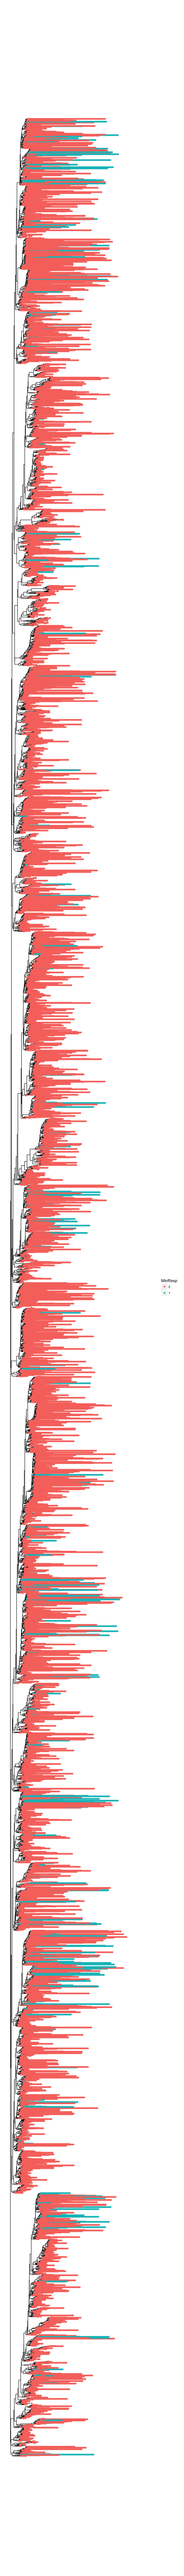

In [493]:
%%R -h 7000 -w 500
data(physeq.full)
plot_tree(physeq.full, color = "MinResp",, ladderize="left", nodeplotblank)